## Model Training
### 1.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [89]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [90]:
df = pd.read_csv('data/Salary Prediction of Data Professions.csv')

In [91]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [92]:
# For categorical columns
df['LAST NAME'].fillna(df['LAST NAME'].mode()[0], inplace=True)
df['DOJ'].fillna(df['DOJ'].mode()[0], inplace=True)

# For numerical columns
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].mean(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].median(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].mean(), inplace=True)

In [102]:
X = df.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'LEAVES USED', 'LEAVES REMAINING', 'SALARY'],axis=1)

In [103]:
X.head()

,SEX,DESIGNATION,AGE,UNIT,RATINGS,PAST EXP
0,F,Analyst,21.0,Finance,2.000000,0
1,F,Associate,24.0,Web,3.486159,7
2,F,Analyst,21.0,Finance,3.000000,0
3,F,Analyst,22.0,IT,3.000000,0
4,M,Analyst,24.0,Operations,3.486159,3


In [104]:
print("Categories in 'SEX' variable:     ",end=" " )
print(df['SEX'].unique())

print("Categories in 'DESIGNATION' variable:  ",end=" ")
print(df['DESIGNATION'].unique())

print("Categories in'UNIT' variable:",end=" " )
print(df['UNIT'].unique())

Categories in 'SEX' variable:      ['F' 'M']
Categories in 'DESIGNATION' variable:   ['Analyst' 'Associate' 'Senior Analyst' 'Senior Manager' 'Manager'
 'Director']
Categories in'UNIT' variable: ['Finance' 'Web' 'IT' 'Operations' 'Marketing' 'Management']


In [105]:
y = df['SALARY']

In [106]:
y

0        44570
1        89207
2        40955
3        45550
4        43161
         ...  
2634    185977
2635     45758
2636     47315
2637     45172
2638     49176
Name: SALARY, Length: 2639, dtype: int64

In [107]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = ['SEX', 'DESIGNATION', 'UNIT']  # Update with your categorical columns

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ],
    remainder='passthrough'  # Ensure all other columns are passed through unchanged
)

# Apply the ColumnTransformer to your dataset
X = preprocessor.fit_transform(X)


In [108]:
X.shape

(2639, 17)

In [109]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2111, 17), (528, 17))

In [110]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [112]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7336.4694
- Mean Absolute Error: 4166.4297
- R2 Score: 0.9581
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9779.0211
- Mean Absolute Error: 4626.5398
- R2 Score: 0.9424


Lasso
Model performance for Training set
- Root Mean Squared Error: 7333.7110
- Mean Absolute Error: 4164.5088
- R2 Score: 0.9581
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9794.7361
- Mean Absolute Error: 4635.4340
- R2 Score: 0.9422


Ridge
Model performance for Training set
- Root Mean Squared Error: 7430.5098
- Mean Absolute Error: 4262.3307
- R2 Score: 0.9570
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10018.9521
- Mean Absolute Error: 4792.0122
- R2 Score: 0.9396


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7418.6997
- Mean Absolute Error: 3699.3692

In [113]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.942411
1,Lasso,0.942225
2,Ridge,0.939550
7,CatBoosting Regressor,0.933124
5,Random Forest Regressor,0.932287
3,K-Neighbors Regressor,0.925233
8,AdaBoost Regressor,0.920377
6,XGBRegressor,0.911293
4,Decision Tree,0.899434


In [114]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.24


Text(0, 0.5, 'Predicted')

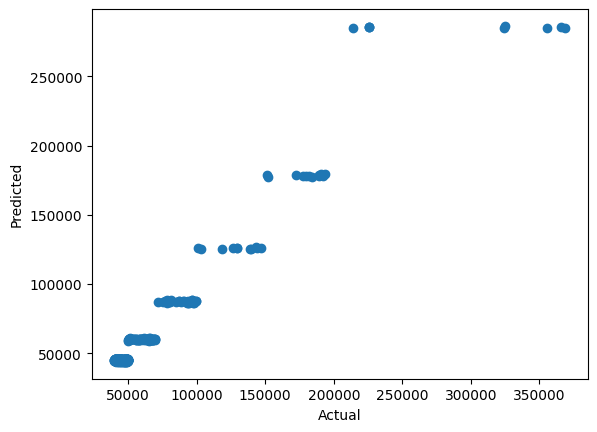

In [115]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='SALARY'>

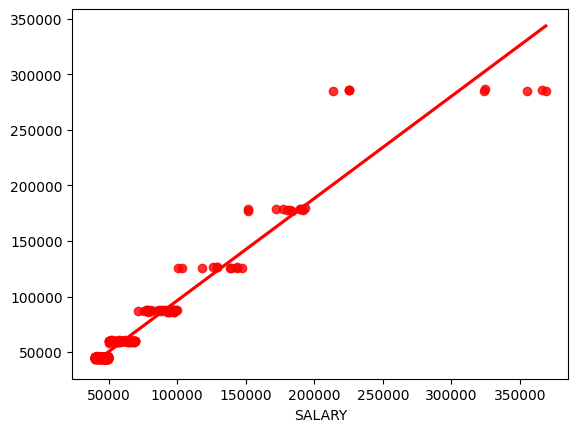

In [116]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [117]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1322,179845,178148.0,1697.0
1185,48441,44788.0,3653.0
2572,40707,45172.0,-4465.0
1709,43144,45172.0,-2028.0
809,84967,87044.0,-2077.0
...,...,...,...
812,54166,60148.0,-5982.0
544,55693,60336.0,-4643.0
1278,42014,45500.0,-3486.0
1199,45188,45020.0,168.0
